In [205]:
import pandas as pd
import numpy as np
import sys
import re
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from matplotlib import style
import seaborn as sns
import math as math
from pylab import rcParams
from scipy import stats
from sklearn.impute import SimpleImputer
from prettytable import PrettyTable
from scipy.stats import zscore 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold, train_test_split, cross_val_score

### Data Exploration

In [101]:
df = pd.read_csv(r'C:\Users\oyeye\Downloads\module_17_starter\data\bank-additional-full.csv', sep = ';')

In [50]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [52]:
df.shape

(41188, 21)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [67]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

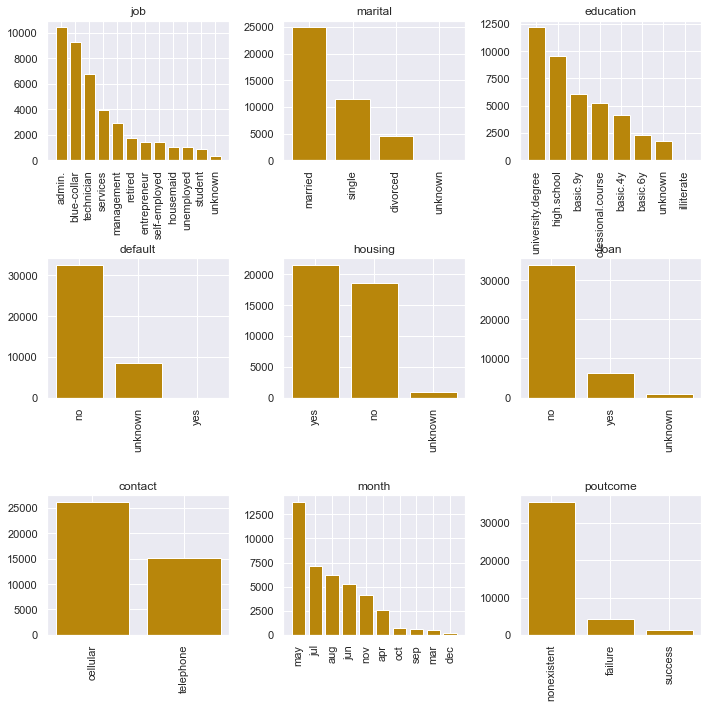

In [74]:
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                   'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (10, 10))

count = 0
for c in categorical_col:
    value_counts = df[c].value_counts()
    subplot_x = count // 3
    subplot_y = count % 3
    x_pos = np.arange(0, len(value_counts))  
    axs[subplot_x, subplot_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = 'darkgoldenrod')
    axs[subplot_x, subplot_y].set_title(c)
    
    for tick in axs[subplot_x, subplot_y].get_xticklabels():
        tick.set_rotation(90)
    count += 1

plt.tight_layout()
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()

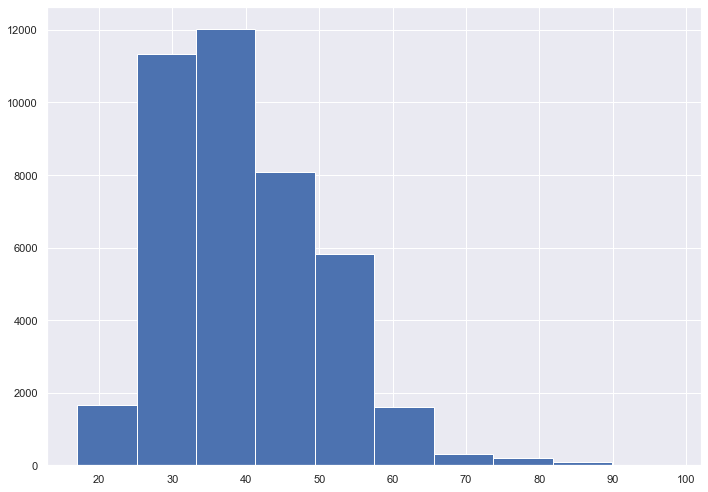

In [75]:
#########Histogram plot for age distribution
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(df['age'])
# Show plot
plt.show()

C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF of pdays for target variable y')

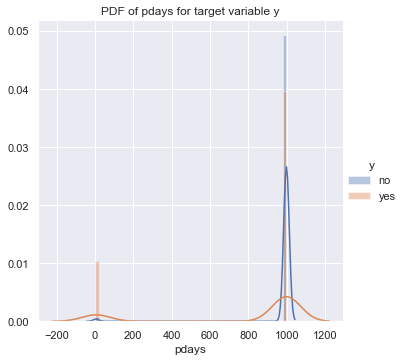

In [76]:
sns.FacetGrid(df, hue='y', size=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable y')

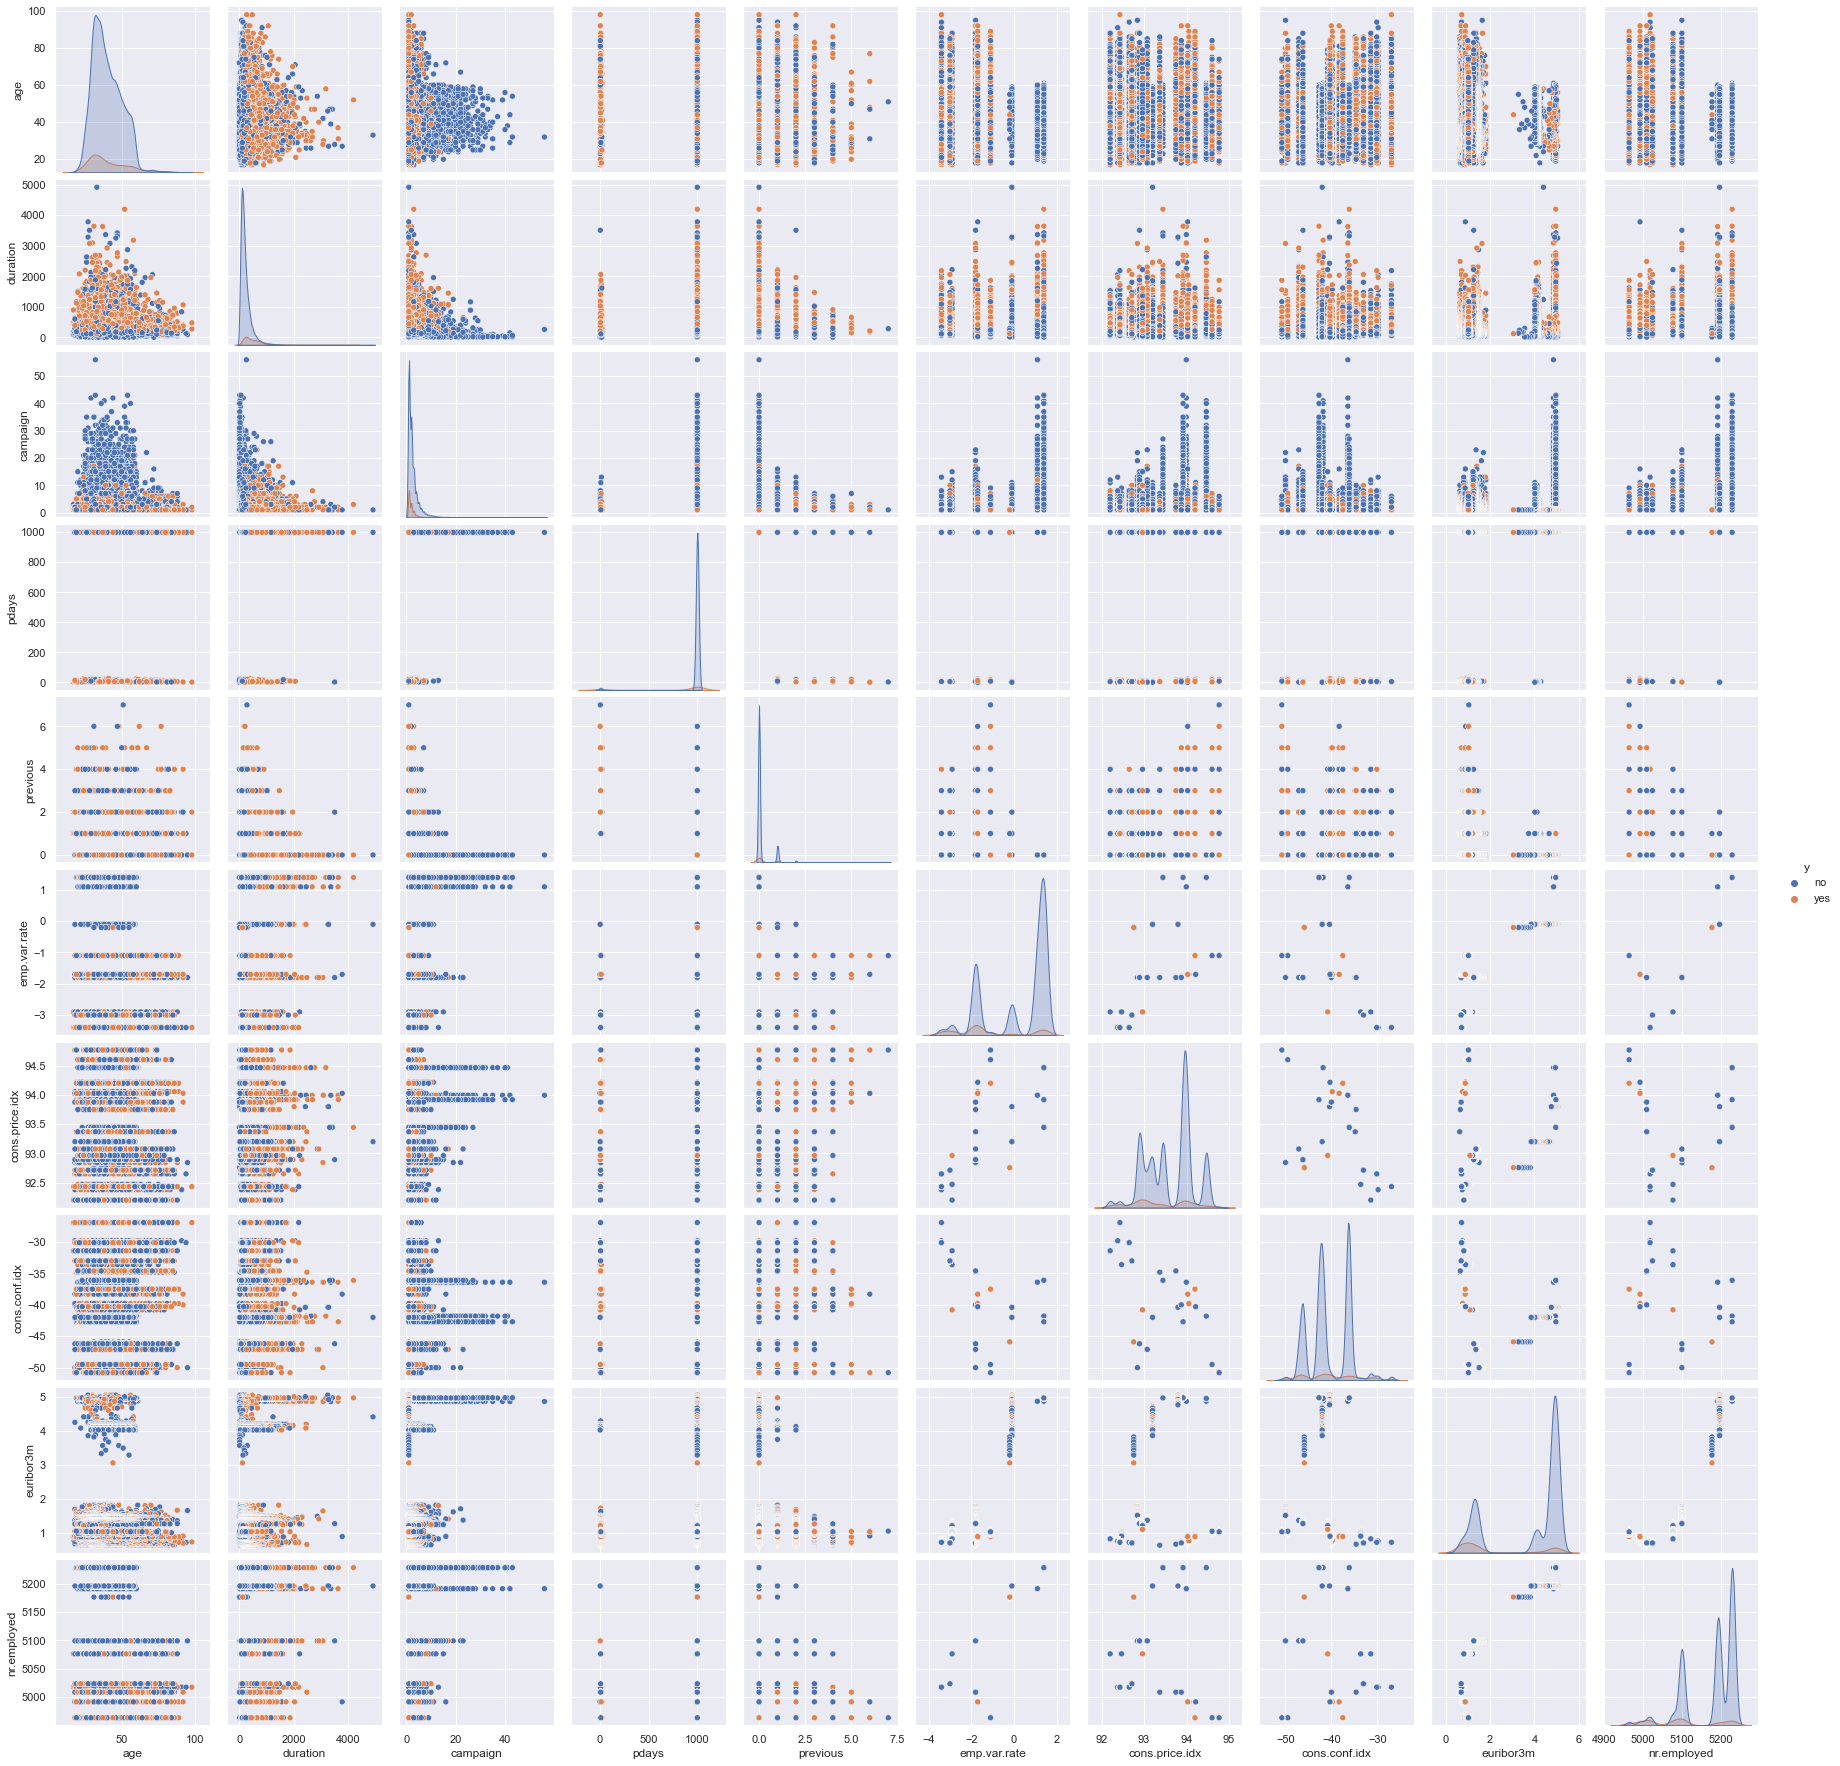

In [77]:
sns.pairplot(df, hue='y')

In [102]:
df['y'] = df['y'].replace({'no' : 0, 'yes' : 1})

In [104]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [105]:
feat = [x for x in df.columns.to_list() if x not in categorical_col]

In [158]:
feat.remove('day_of_week')
feat.remove('y')

In [160]:
feat

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

<AxesSubplot:>

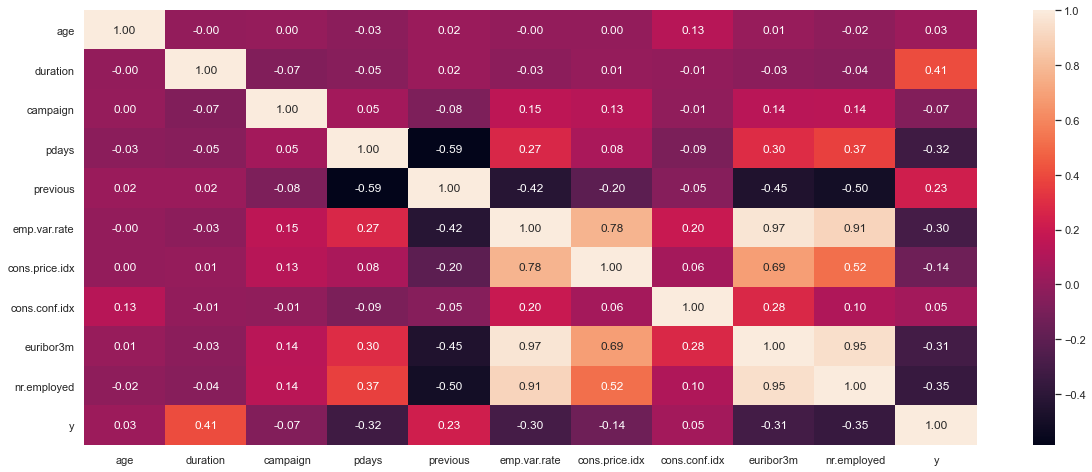

In [106]:
sns.heatmap(df[feat].corr(), annot = True, fmt = '.2f')

In [107]:
q3 = df[feat].quantile(0.75)
q1 = df[feat].quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
y                   0.000
dtype: float64


In [108]:
data_out = df[~((df[feat] < (q1 - 1.5 * iqr)) |(df[feat] > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - df.shape[0]))

0 points are outliers based on IQR


<ipython-input-108-66b4d70a0daa>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_out = df[~((df[feat] < (q1 - 1.5 * iqr)) |(df[feat] > (q3 + 1.5 * iqr))).any(axis=1)]
<ipython-input-108-66b4d70a0daa>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_out = df[~((df[feat] < (q1 - 1.5 * iqr)) |(df[feat] > (q3 + 1.5 * iqr))).any(axis=1)]


In [112]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [113]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [161]:
dff[feat] = dff[feat].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [162]:
dff

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,1,0,0,0,0,0,0,1,0
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,1,0,0,0,0,0,0,1,0
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,1,0,0,0,0,0,0,1,0
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,1,0,0,0,0,0,0,1,0


In [164]:
features = dff.drop('y', axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["Features"] = features.columns
vif

C:\Users\oyeye\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,9.873695,age
1,2.024922,duration
2,1.384147,campaign
3,229.232318,pdays
4,5.968519,previous
5,1210.742669,emp.var.rate
6,339.048783,cons.price.idx
7,26.586573,cons.conf.idx
8,488.748047,euribor3m
9,746.592968,nr.employed


### Modelling

In [165]:
y = dff['y']

In [166]:
x_train, x_test, y_train, y_test = train_test_split(dff.drop(['y'], axis=1), y, test_size=0.20, random_state=42)

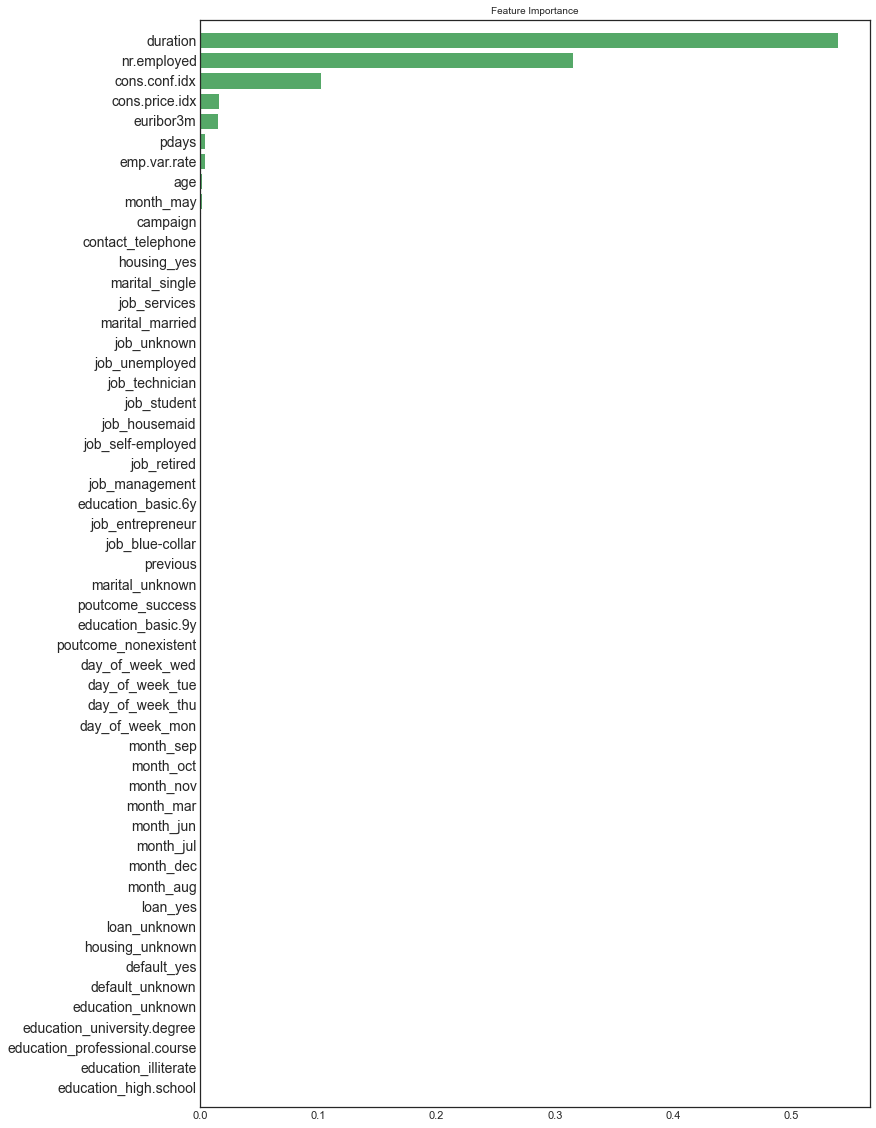

In [167]:
plt.style.use('seaborn-white')

clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = dff.drop('y', axis=1).columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12, 20))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [168]:
x_train = x_train[['duration', 'nr.employed', 'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'pdays', 'emp.var.rate']]

In [169]:
x_test = x_test[['duration', 'nr.employed', 'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'pdays', 'emp.var.rate']]

In [170]:
x_train

,duration,nr.employed,cons.conf.idx,cons.price.idx,euribor3m,pdays,emp.var.rate
12556,0.019113,1.000000,0.338912,0.669135,0.980730,1.000000,1.000000
35451,0.023587,0.512287,0.192469,0.269680,0.138291,1.000000,0.333333
30592,0.002643,0.512287,0.192469,0.269680,0.163228,1.000000,0.333333
17914,0.019113,1.000000,0.338912,0.669135,0.980957,1.000000,1.000000
3315,0.069947,0.859735,0.602510,0.698753,0.958059,1.000000,0.937500
...,...,...,...,...,...,...,...
6265,0.086824,0.859735,0.602510,0.698753,0.957379,1.000000,0.937500
11284,0.058560,1.000000,0.376569,0.882307,0.980957,1.000000,1.000000
38158,0.039447,0.203781,1.000000,0.089634,0.027205,0.004004,0.000000
860,0.059984,0.859735,0.602510,0.698753,0.957153,1.000000,0.937500


### Logistic Regression

In [172]:
score = {}

In [173]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1, 3, 5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 5}
Best score: 0.9243695763073794


**************************************************
Train AUC: 0.925
Test AUC: 0.929
**************************************************
Train Accuracy: 0.849
Test Accuracy: 0.850


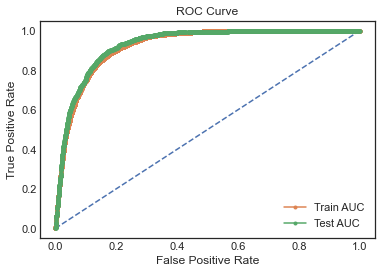

In [175]:
from sklearn.metrics import log_loss

model = LogisticRegression(C = 5, class_weight='balanced', n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Confusion matrix:
 [[24828  4417]
 [  559  3146]]


<AxesSubplot:>

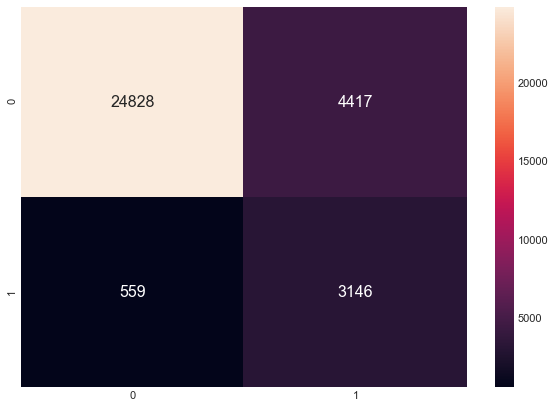

In [176]:
#########Train Confusion Matrix
cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[6184 1119]
 [ 120  815]]


<AxesSubplot:>

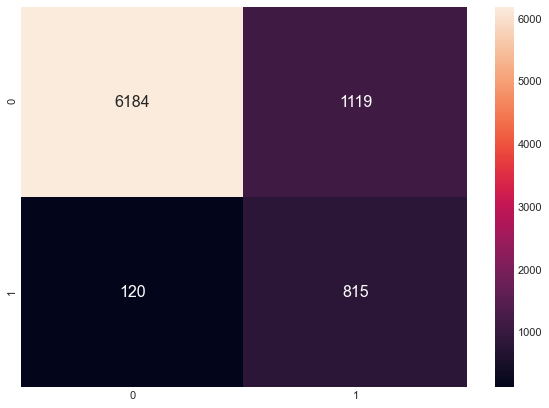

In [177]:
###########Test Confusion Matrix
cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Random Forest

In [178]:
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, 
                         n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 500, 'max_depth': 10}
Best score: 0.9421920630053375


**************************************************
Train AUC: 0.968
Test AUC: 0.945
**************************************************
Train Accuracy: 0.870
Test Accuracy: 0.854


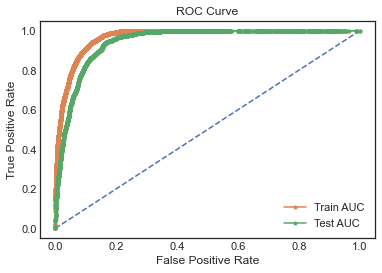

In [180]:
model = RandomForestClassifier(n_estimators = 500, max_depth = 10, class_weight = 'balanced', n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Support Vector Machine

In [184]:
params = {'alpha': [10**i for i in range(-4, 5)]}

model = SGDClassifier(class_weight = 'balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, 
                         n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters:  {'alpha': 0.0001}
Best score: 0.9235575985744706


**************************************************
Train AUC: 0.923
Test AUC: 0.928
**************************************************
Train Accuracy: 0.814
Test Accuracy: 0.817


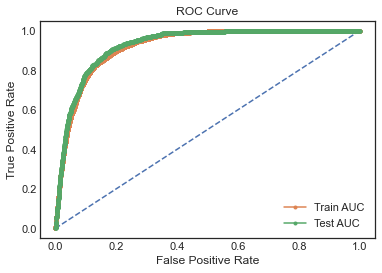

In [185]:
model = SGDClassifier(alpha = 0.0001, class_weight = 'balanced', n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.decision_function(x_train)
y_probs_test = model.decision_function(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['SVM'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### XGBOOST

In [190]:
params = {'max_depth': [5, 10, 15], 'n_estimators': [10, 100, 500]}

model = XGBClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions = params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[21:44:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best parameters:  {'n_estimators': 100, 'max_depth': 5}
Best score: 0.9459718248894985


[21:45:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


**************************************************
Train AUC: 0.966
Test AUC: 0.948
**************************************************
Train Accuracy: 0.937
Test Accuracy: 0.916


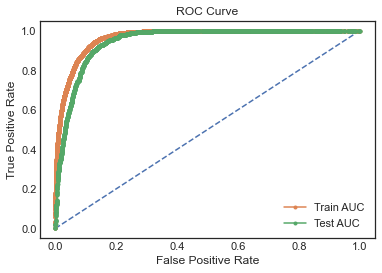

In [192]:
model = XGBClassifier(max_depth=5, n_estimators=100 ,class_weight='balanced', n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['XGBoost'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Decision Tree Classifier

In [196]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}
model = DecisionTreeClassifier(class_weight='balanced')
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'min_samples_split': 0.05, 'min_impurity_decrease': 0.01, 'max_depth': 10}
Best score: 0.909163290540224


**************************************************
Train AUC: 0.861
Test AUC: 0.862
**************************************************
Train Accuracy: 0.904
Test Accuracy: 0.901


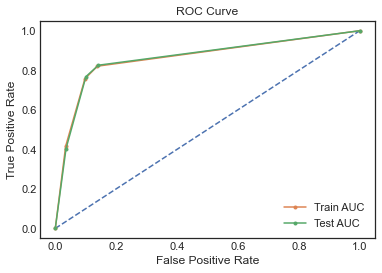

In [207]:
model = DecisionTreeClassifier(min_samples_split = 0.05, min_impurity_decrease = 0.01, max_depth = 10)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Decision Tree'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Table for Different Models 

In [208]:
table = PrettyTable(['Model', 'Test AUC', 'Test Accuracy'])
for item in score.items():
    table.add_row([item[0], item[1][0], item[1][1]])
print(table)

***************  Comparison of different models  ****************
+---------------------+--------------------+--------------------+
|        Model        |      Test AUC      |   Test Accuracy    |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.9294108127858963 | 0.8495994173343044 |
|    Random Forest    | 0.8616505853209545 | 0.9010682204418549 |
|         SVM         | 0.9279977241789873 | 0.816703083272639  |
|       XGBoost       | 0.9478536767177214 | 0.9155134741442098 |
|    Decision Tree    | 0.8616505853209545 | 0.9010682204418549 |
+---------------------+--------------------+--------------------+
